In [3]:
%matplotlib inline

<br>
<br>

# Heatmaps in matplotlib

# Sections

- [Simple heat maps](#Simple-heat-map)
    - [Using NumPy's histogram2d](#Using-NumPy's-histogram2d)
    - [Using hist2d from matplotlib](#Using-hist2d-from-matplotlib)
    - [Using pcolor from matplotlib](#Using-pcolor-from-matplotlib)
    - [Using matshow from matplotlib](#Using-matshow-from-matplotlib)
- [Using different color maps](#Using-different-color-maps)
    - [Available color maps](#Available-color-maps)
- [Creating heat maps with a log-scale color map](#Creating-heat-maps-with-a-log-scale-color-map)

<br>
<br>

<br>
<br>

# Simple heat maps

[[back to top](#Sections)]

In [4]:
import numpy as np

# Sample from a bivariate Gaussian distribution
mean = [0,0]
cov = [[0,1],[1,0]] 
x, y = np.random.multivariate_normal(mean, cov, 10000).T

<br>
<br>

### Using NumPy's histogram2d

[[back to top](#Sections)]

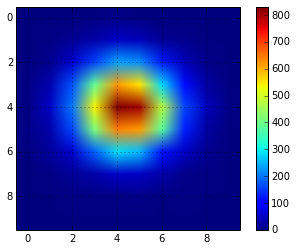

In [5]:
from matplotlib import pyplot as plt

hist, xedges, yedges = np.histogram2d(x,y)
X,Y = np.meshgrid(xedges,yedges)
plt.imshow(hist)
plt.grid(True)
plt.colorbar()
plt.show()

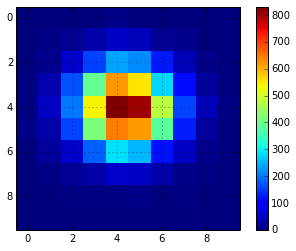

In [6]:
# changing the interpolation

plt.imshow(hist, interpolation='nearest')
plt.grid(True)
plt.colorbar()
plt.show()

<br>
<br>

### Using hist2d from matplotlib

[[back to top](#Sections)]

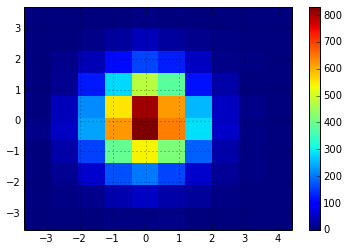

In [7]:
plt.hist2d(x, y, bins=10)
plt.colorbar()
plt.grid()
plt.show()

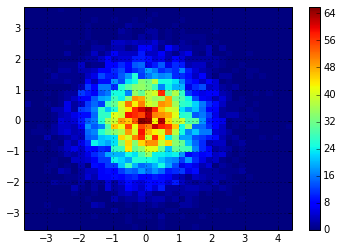

In [8]:
# changing the bin-size

plt.hist2d(x, y, bins=40)
plt.colorbar()
plt.grid()
plt.show()

<br>
<br>

### Using pcolor from matplotlib

[[back to top](#Sections)]

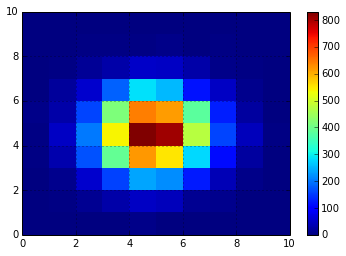

In [9]:
plt.pcolor(hist)
plt.colorbar()
plt.grid()
plt.show()

<br>
<br>

### Using matshow from matplotlib

[[back to top](#Sections)]

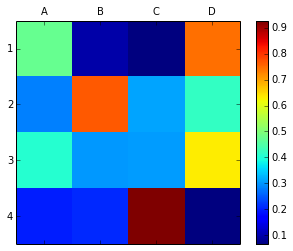

In [4]:
import numpy as np
import matplotlib.pyplot as plt

columns = ['A', 'B', 'C', 'D']
rows = ['1', '2', '3', '4']

data = np.random.random((4,4))

fig = plt.figure()

ax = fig.add_subplot(111)

cax = ax.matshow(data, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels([''] + columns)
ax.set_yticklabels([''] + rows)

plt.show()

<br>
<br>

# Using different color maps

[[back to top](#Sections)]

<br>
<br>

### Available color maps

[[back to top](#Sections)]

More color maps are available at [http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps](http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps)

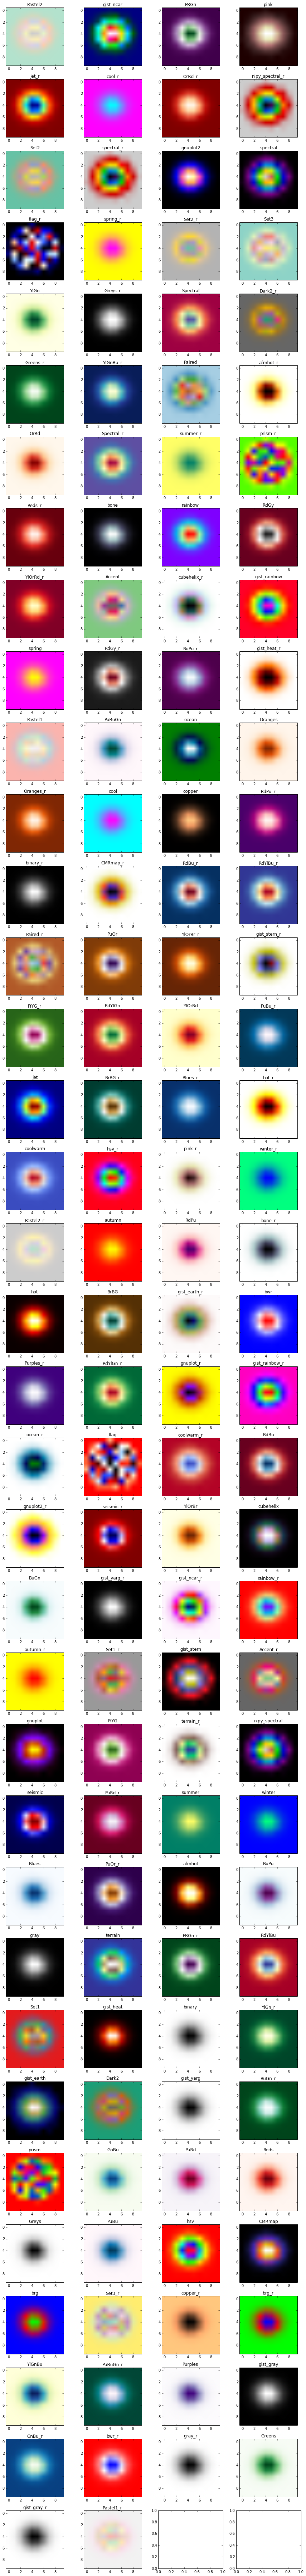

In [27]:
from math import ceil
import numpy as np

# Sample from a bivariate Gaussian distribution
mean = [0,0]
cov = [[0,1],[1,0]] 
x, y = np.random.multivariate_normal(mean, cov, 10000).T


size = len(plt.cm.datad.keys())
all_maps = list(plt.cm.datad.keys())

fig, ax = plt.subplots(ceil(size/4), 4, figsize=(12,100))

counter = 0
for row in ax:
    for col in row:
        try:
            col.imshow(hist, cmap=all_maps[counter])
            col.set_title(all_maps[counter])
        except IndexError:
           break
        counter += 1

plt.tight_layout()
plt.show()

<br>
<br>

### New colormaps 

[[back to top](#Sections)]

New colormaps designed by [Stéfan van der Walt and Nathaniel Smith](http://bids.github.io/colormap/) were included in matplotlib 1.5, and the viridis colormap will be the new default colormap in matplotlib 2.0.

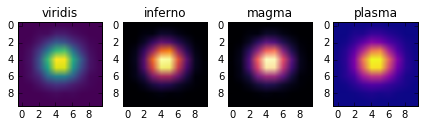

In [4]:
from math import ceil
import numpy as np
from matplotlib import pyplot as plt

# Sample from a bivariate Gaussian distribution
mean = [0,0]
cov = [[0,1],[1,0]] 
x, y = np.random.multivariate_normal(mean, cov, 10000).T


size = len(plt.cm.datad.keys())
all_maps = list(plt.cm.datad.keys())

new_maps = ['viridis', 'inferno', 'magma', 'plasma']

counter = 0
for i in xrange(4):
    plt.subplot(1, 4, counter + 1)
    
    plt.imshow(hist, cmap=new_maps[counter])
    plt.title(new_maps[counter])
    counter += 1

plt.tight_layout()
plt.show()

To use 'viridis' in [matplotlib 1.4](http://stackoverflow.com/questions/32484453/how-to-use-viridis-in-matplotlib-1-4), it's possible to include the colormap from the `cmaps` package. 

    import colormaps as cmaps
    plt.register_cmap(name='viridis', cmap=cmaps.viridis)
    plt.set_cmap(cmaps.viridis)

    img=mpimg.imread('stinkbug.png')
    lum_img = np.flipud(img[:,:,0])
    imgplot = plt.pcolormesh(lum_img)

# Creating heat maps with a log-scale color map

[[back to top](#Sections)]

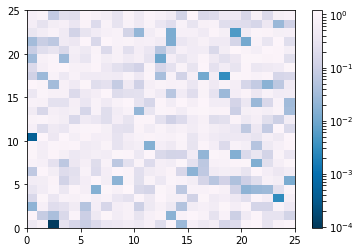

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

np.random.seed(1)
a = np.random.random((25, 25))

plt.subplot(1, 1, 1)
plt.pcolor(a, norm=LogNorm(vmin=a.min() / 1.2, vmax=a.max() * 1.2), cmap='PuBu_r')
plt.colorbar()

plt.show()